# 加速：多線程爬蟲



* 了解知乎 API 使用方式與回傳內容
* 撰寫程式存取 API 且添加標頭

## 作業目標

* 找一個之前實作過的爬蟲改用多線程改寫，比較前後時間的差異。





In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import _thread
import time

In [6]:
def ExchangeRateHistory(cash):
    # 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
    currency = cash.find(name='div', attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(" ", ""))  # 貨幣種類
    
    # 針對美金，找到其「歷史匯率」的首頁 
    history_link = cash.find(name='td', attrs={'data-table':'歷史匯率'})
    history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

    #
    # 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
    #
    # 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
    quote_history_url = history_rate_link.replace("history", "quote/2019-08")
    resp = requests.get(quote_history_url)
    resp.encoding = 'utf-8'
    history = BeautifulSoup(resp.text, "lxml")
    history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

    #
    # 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
    #
    date_history = list()
    history_buy = list()
    history_sell = list()

    for history_rate in history_table:
        # 擷取日期資料
        date_string = history_rate.a.get_text()
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
        date_history.append(date)  # 日期歷史資料

        history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
        history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
        history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

    # 將匯率資料建成dataframe形式
    HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                        'buy_rate':history_buy,
                                        'sell_rate':history_sell})

    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

    # 畫出歷史匯率軌跡圖
    plt.figure(figsize=(10, 8))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.title(currency.get_text().replace(" ", ""))
    plt.show()

# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')




美金(USD)



<Figure size 720x576 with 0 Axes>

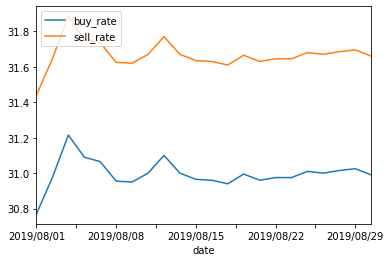


港幣(HKD)



<Figure size 720x576 with 0 Axes>

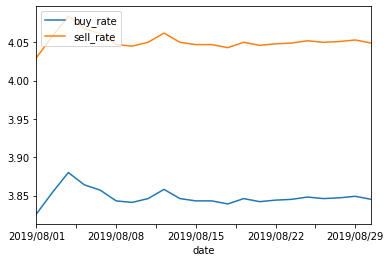


英鎊(GBP)



<Figure size 720x576 with 0 Axes>

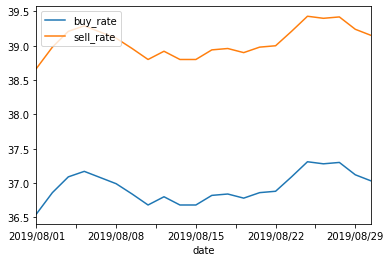


澳幣(AUD)



<Figure size 720x576 with 0 Axes>

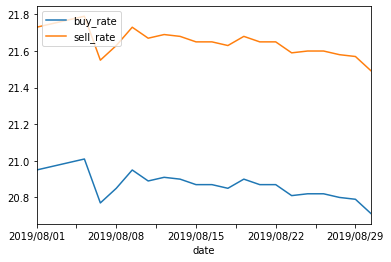


加拿大幣(CAD)



<Figure size 720x576 with 0 Axes>

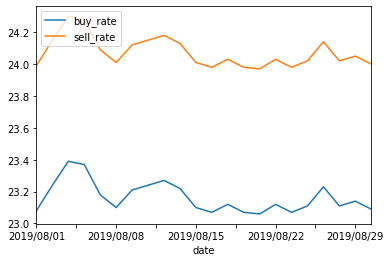


新加坡幣(SGD)



<Figure size 720x576 with 0 Axes>

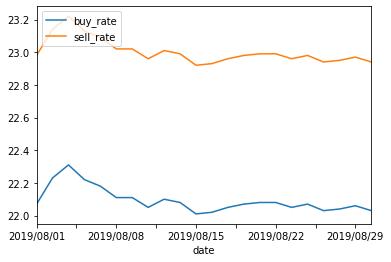


瑞士法郎(CHF)



<Figure size 720x576 with 0 Axes>

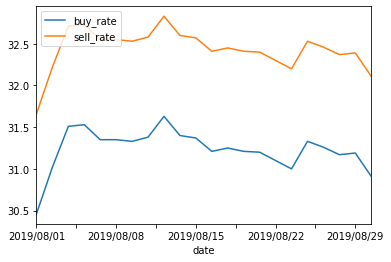


日圓(JPY)



<Figure size 720x576 with 0 Axes>

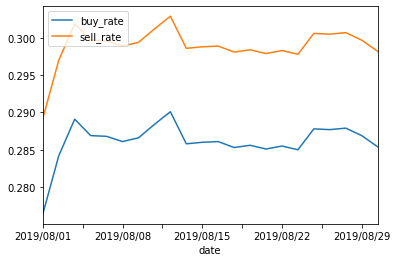


南非幣(ZAR)



<Figure size 720x576 with 0 Axes>

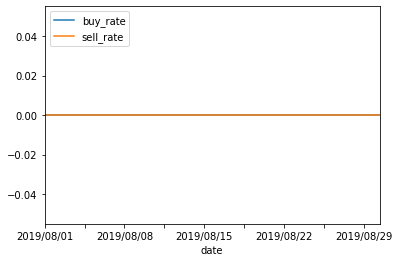


瑞典幣(SEK)



<Figure size 720x576 with 0 Axes>

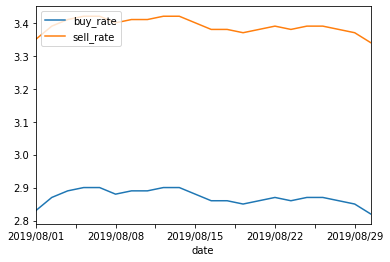


紐元(NZD)



<Figure size 720x576 with 0 Axes>

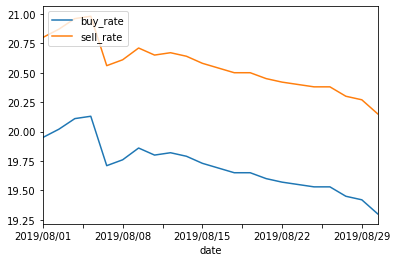


泰幣(THB)



<Figure size 720x576 with 0 Axes>

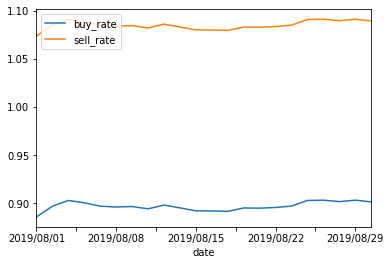


菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

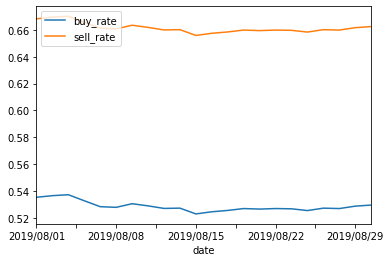


印尼幣(IDR)



<Figure size 720x576 with 0 Axes>

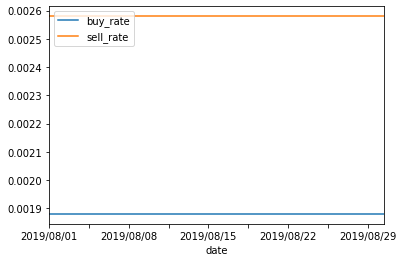


歐元(EUR)



<Figure size 720x576 with 0 Axes>

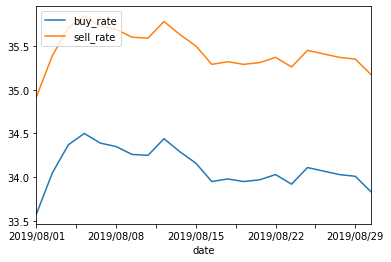


韓元(KRW)



<Figure size 720x576 with 0 Axes>

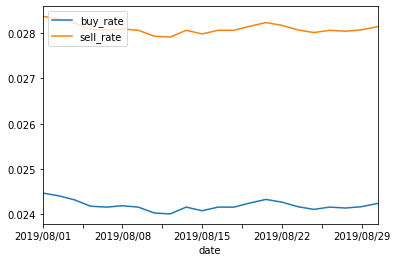


越南盾(VND)



<Figure size 720x576 with 0 Axes>

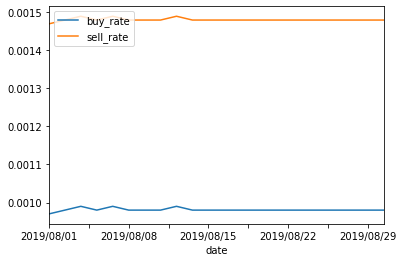


馬來幣(MYR)



<Figure size 720x576 with 0 Axes>

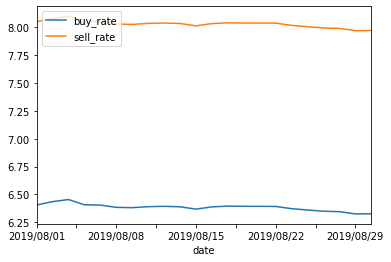


人民幣(CNY)



<Figure size 720x576 with 0 Axes>

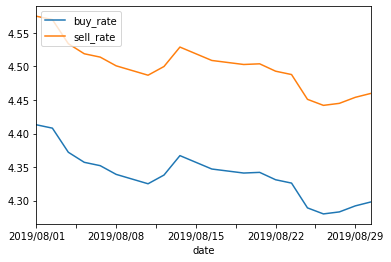

38.61534905433655


In [4]:
startTime = time.time()
for cash in rate_table:
    ExchangeRateHistory(cash)
finishTime = time.time()
print(finishTime - startTime) # 正常情況的爬蟲所需時間

0.0009944438934326172
英鎊(GBP)

加拿大幣(CAD)


美金(USD)


日圓(JPY)


人民幣(CNY)


瑞典幣(SEK)


新加坡幣(SGD)


南非幣(ZAR)


越南盾(VND)


紐元(NZD)


澳幣(AUD)


韓元(KRW)


印尼幣(IDR)


馬來幣(MYR)


瑞士法郎(CHF)


港幣(HKD)


歐元(EUR)



泰幣(THB)



菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24163 missing from current font.
  font.set_text(s, 0.0, flags=

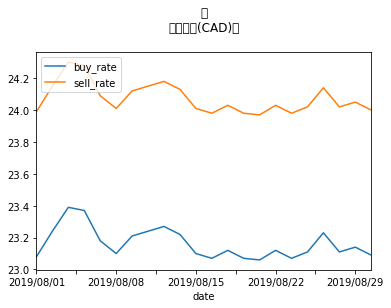

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28207 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28207 missing from current font.
  font.set_text(s, 0, flags=flags)


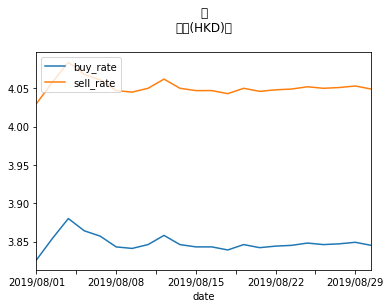

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29790 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20856 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29790 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20856 missing from current font.
  font.set_text(s, 0, flags=flags)


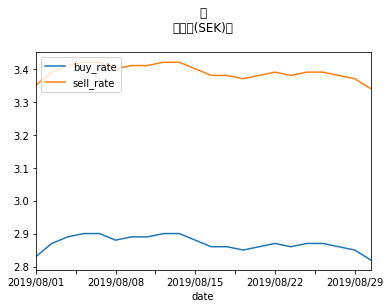

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36234 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36234 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0, flags=f

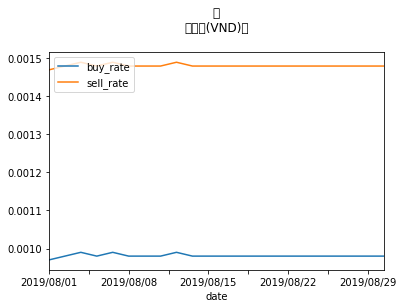

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22369 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22369 missing from current font.
  font.set_text(s, 0, flags=flags)


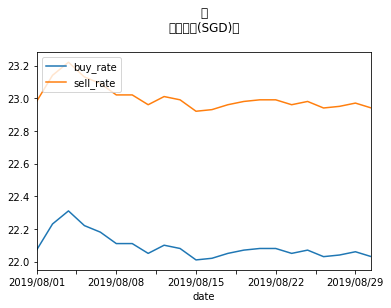

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33778 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22283 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33778 missing from current font.
  font.set_text(s, 0, flags

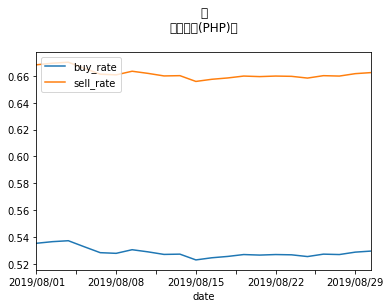

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20803 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38867 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20803 missing from current font.
  font.set_text(s, 0, flags=flags)


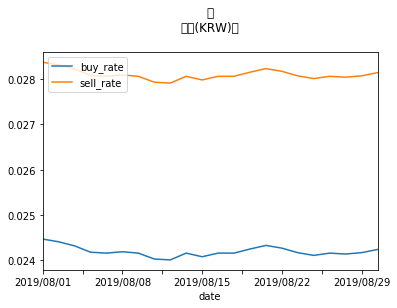

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27665 missing from current font.
  font.set_text(s, 0, flags=flags)


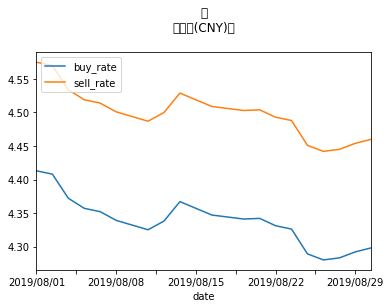

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22291 missing from current font.
  font.set_text(s, 0, flags=flags)


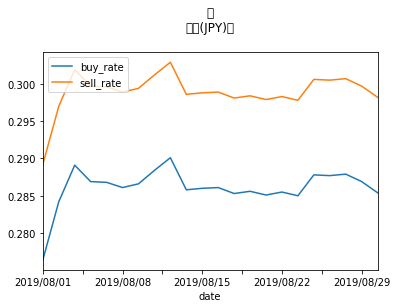

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38750 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38750 missing from current font.
  font.set_text(s, 0, flags=flags)


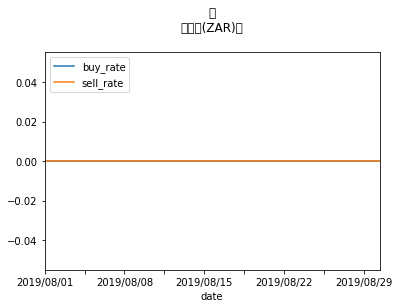

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27888 missing from current font.
  font.set_text(s, 0, flags=flags)


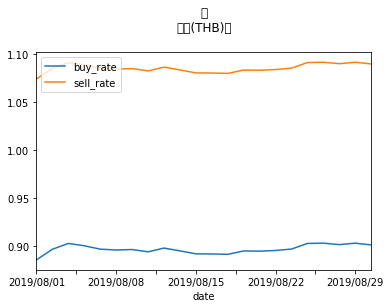

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21360 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23612 missing from current font.
  font.set_text(s, 0, flags=flags)


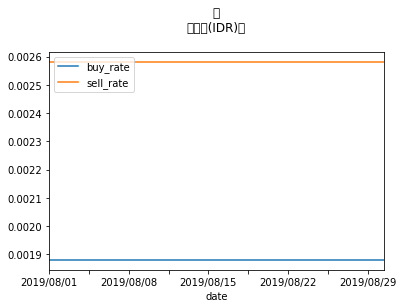

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39340 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20358 missing from current font.
  font.set_text(s, 0, flags=flags)


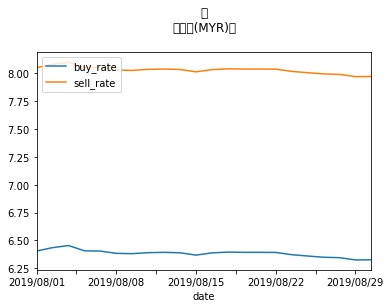

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27861 missing from current font.
  font.set_text(s, 0, flags=f

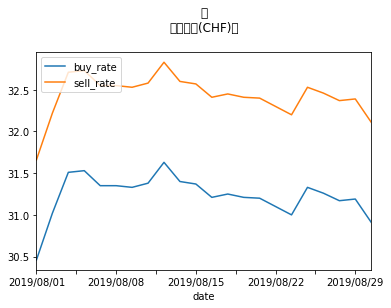

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28595 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28595 missing from current font.
  font.set_text(s, 0, flags=flags)


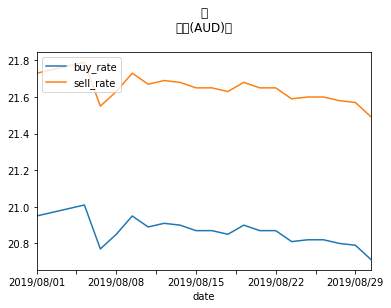

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32654 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32654 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0, flags=flags)


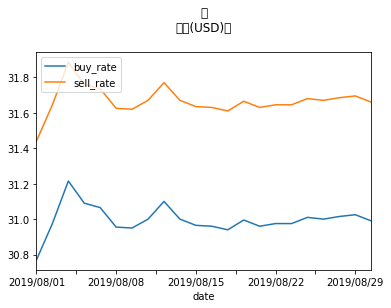

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37770 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37770 missing from current font.
  font.set_text(s, 0, flags=flags)


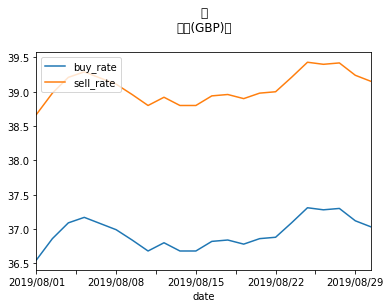

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27472 missing from current font.
  font.set_text(s, 0, flags=flags)


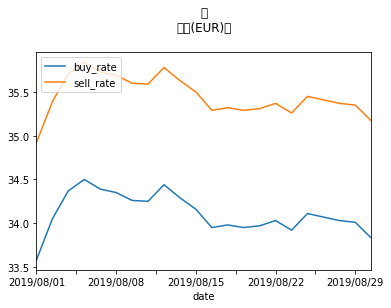

<Figure size 720x576 with 0 Axes>

C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jason.ho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32016 missing from current font.
  font.set_text(s, 0, flags=flags)


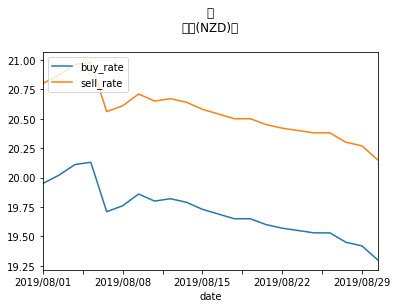

In [7]:
startTime = time.time()
for cash in rate_table:
    _thread.start_new_thread( ExchangeRateHistory, (cash, ) )    
finishTime = time.time()
print(finishTime - startTime) # 利用 thread 的爬蟲所需時間